In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTING DATASET
df = pd.read_csv('My Uber Drives - 2016.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
#NAMES AND DATATYPES OF ALL COLUMNS
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [4]:
###REMOVING UNNECESSARY * IN NAMES OF ALL COLUMNS
df.columns = df.columns.str.replace('*','')

In [5]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [6]:
##INFO ABOUT ALL COLUMNS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
##TO CHECK IF ANY NULL VALUE
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [9]:
###Drop the rows where all elements are missing.
df.dropna(how='all',subset=['END_DATE','CATEGORY','START','STOP','PURPOSE'],inplace=True)

In [10]:
##To check if any null value
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [11]:
##Replace Null value with last valid observation to fill the gap
df.PURPOSE.fillna(method='ffill',inplace=True)

In [12]:
##To check if any null value
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [13]:
## To convert datatype of column to Date Time datatype
df.START_DATE = pd.to_datetime(df['START_DATE'],errors='coerce')
df.END_DATE = pd.to_datetime(df['END_DATE'],errors='coerce')

In [14]:
## see the change that Start date and end date  columns have been changed from object to date time datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [15]:
#TOP 10 START LOCATIONS
df.START.value_counts().head(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

<AxesSubplot:ylabel='START'>

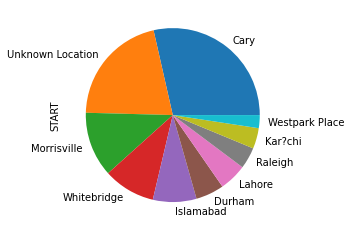

In [16]:
#Plotting top 10 start locations
start_point = df.START.value_counts()
start_point.head(10).plot(kind='pie')

<AxesSubplot:ylabel='START'>

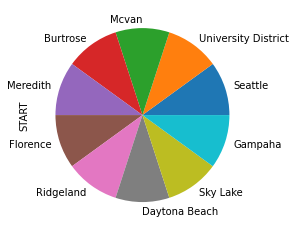

In [17]:
#Top 10 least start locations
start_point = df.START.value_counts()
start_point.tail(10).plot(kind='pie')

<AxesSubplot:ylabel='STOP'>

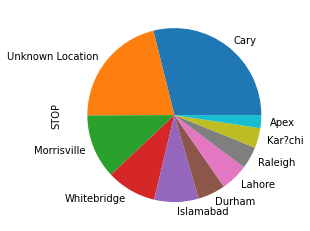

In [18]:
#TOP 10 STOP LOCATIONS
stop_point = df.STOP.value_counts()
stop_point.head(10).plot(kind='pie')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '9.9'),
  Text(1, 0, '3.1'),
  Text(2, 0, '2.1'),
  Text(3, 0, '10.4'),
  Text(4, 0, '3.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '1.7'),
  Text(7, 0, '1.8'),
  Text(8, 0, '2.2'),
  Text(9, 0, '2.8'),
  Text(10, 0, '1.9'),
  Text(11, 0, '2.0'),
  Text(12, 0, '3.3'),
  Text(13, 0, '6.1'),
  Text(14, 0, '3.8')])

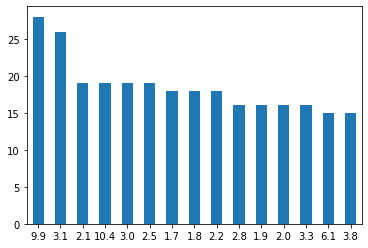

In [19]:
#top 10 same number of miles travelled
df.MILES.value_counts().head(15).plot(kind='bar')
plt.xticks(rotation=0)

<AxesSubplot:xlabel='MILES'>

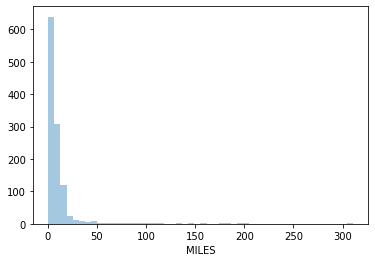

In [20]:
##distribution plot of miles travelled
sns.distplot(df.MILES,kde=False)

<AxesSubplot:>

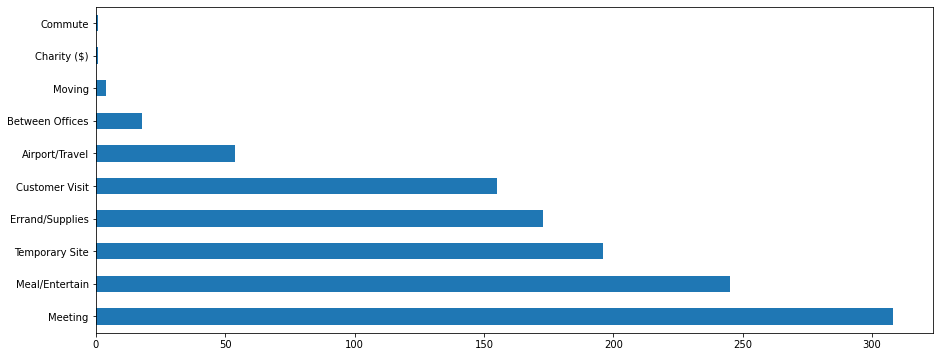

In [21]:
#Purpose of travel
df.PURPOSE.value_counts().plot(kind='barh',figsize=(15,6))

In [22]:
##top 10 miles travelled in dataset
df.groupby(['START','STOP'])['MILES'].max().reset_index().sort_values('MILES',ascending=False).head(10)

,START,STOP,MILES
173,Latta,Jacksonville,310.3
143,Jacksonville,Kissimmee,201.0
11,Asheville,Mebane,195.9
320,Unknown Location,Unknown Location,195.6
204,Morrisville,Banner Elk,195.3
27,Boone,Cary,180.2
144,Jacksonville,Ridgeland,174.2
112,Florence,Cary,159.3
45,Cary,Latta,144.0
260,Ridgeland,Florence,144.0


In [23]:
##MAKING A NEW MINUTES COLUMN
df['MINUTES'] = df.END_DATE-df.START_DATE
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00


In [24]:
##Formatting the minutes column properly
df['MINUTES'] = df.MINUTES.dt.total_seconds()/60
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


In [25]:
## TO CHECK IF START AND STOP COLUMN HAVE SAME VALUE AND IF SAME THEN YES IN NEW COLUMN ROUNTRIP ELSE NO
def round(x):
    if x['START'] == x['STOP']:
        return 'yes'
    else:
        return 'No'
df['ROUNDTRIP'] = df.apply(round, axis=1)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUNDTRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,No
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,No
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,No


In [26]:
##ANOTHER METHOD OF CHECKING IF START AND STOP COLUMN HAVE SAME VALUE AND IF SAME THEN YES IN NEW COLUMN ROUNTRIP ELSE NO
lst = []
for i , j in zip(df.START,df.STOP):
    if i == j:
        lst.append('yes')
    else:
        lst.append('no')
df['ROUNDTRIP'] = lst
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUNDTRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

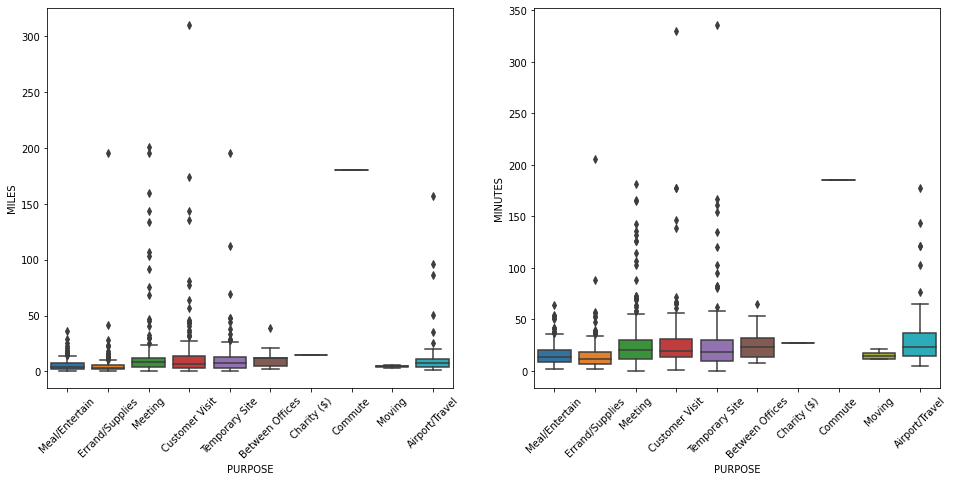

In [27]:
##Relationship between purpose and miles & Relationship between purpose and minutes
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y= df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y= df.MINUTES)
plt.xticks(rotation=45)

In [28]:
##making a new column month with the help of START DATE COLUMN
df['month'] = pd.DatetimeIndex(df['START_DATE']).month
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUNDTRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,12


In [29]:
# ASSIGNING NAMES TO MONTHS
def Month(df):
    if df['month'] == 1:
        return('January')
    elif df['month'] == 2:
        return('February')
    elif df['month'] == 3:
        return('March')
    elif df['month'] == 4:
        return('April')
    elif df['month'] == 5:
        return('May')
    elif df['month'] == 6:
        return('June')
    elif df['month'] == 7:
        return('July')
    elif df['month'] == 8:
        return('August')
    elif df['month'] == 9:
        return('September')
    elif df['month'] == 10:
        return('October')
    elif df['month'] == 11:
        return('November')
    elif df['month'] == 12:
        return('December')
df['month'] = df.apply(Month, axis=1)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUNDTRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,January
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,December
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,December
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,December
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,December


<AxesSubplot:xlabel='MINUTES', ylabel='MILES'>

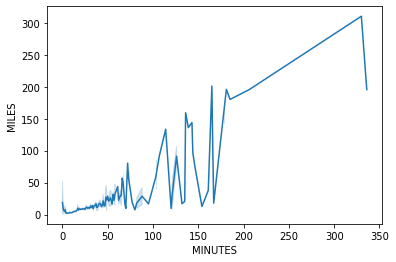

In [30]:
##RELATIONSHIP BETWEEN MINUTES AND MILES
sns.lineplot(data=df, x= df.MINUTES,y=df.MILES)

<AxesSubplot:xlabel='MINUTES', ylabel='MILES'>

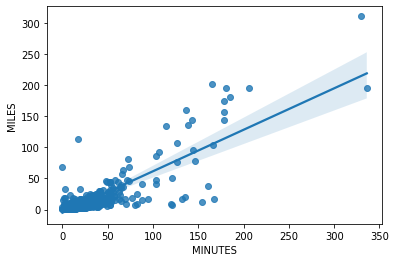

In [31]:
##REGRESSION PLOT BETWEEN MINUTES AND MILES
sns.regplot(data=df, x= df.MINUTES,y=df.MILES)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

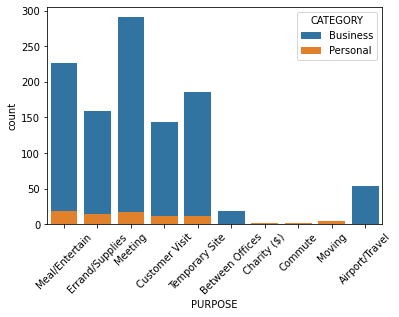

In [32]:
##RELATIONSHIP BETWEEN PURPOSE AND CATEGORY
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)

In [33]:
###HOW MANY MONTHS HAVE HOW MANY ROUNDTRIPS
df.groupby(['month','ROUNDTRIP'])['ROUNDTRIP'].count()

month      ROUNDTRIP
April      no            49
           yes            5
August     no            86
           yes           47
December   no            63
           yes           83
February   no            86
           yes           29
January    no            44
           yes           17
July       no           101
           yes           11
June       no            97
           yes           11
March      no            99
           yes           14
May        no            49
November   no            96
           yes           26
October    no            82
           yes           24
September  no            15
           yes           21
Name: ROUNDTRIP, dtype: int64

# CONCLUSION:-
1) In december highest number of trips are booked.
2) More business trips are booked then any other.
3) commute, moving , charity are only done in personal trips.
4) cary is the most famous start and stop location.
5) seasonal pattern impacts the booking of the cab.
6) round trips were observed in the data.
7) usually major trips were booked for meeting, meal, temporary site and errand supplies.
8) time of trip increases as miles increases.
9) same start and stop locations have report different mile distances.